## Data Inspection

In [1]:
import yt
import os
import numpy as np
%matplotlib inline

/home/jmiller/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
yt.__file__

'/home/jmiller/.local/lib/python2.7/site-packages/yt-3.3.dev0-py2.7-linux-x86_64.egg/yt/__init__.pyc'

In [3]:
import yt.frontends
print "SimulationIO is a valid frontend: ",'simulationio' in dir(yt.frontends)

SimulationIO is a valid frontend:  True


In [4]:
base_dir='/home/jmiller/programming/SimulationIO-yt-tests'
source_dir=base_dir+'/cactus/'

In [5]:
fname='example.s5'

In [6]:
ds = yt.load(source_dir+fname,
             domain_left_edge=[-1,-1,-1],
             domain_dds = [0.05,0.05,0.05],
             periodicity=(True,True,True),
             ghost_zones=0)

yt : [INFO     ] 2016-05-15 15:00:41,850 SimulationIO: Configuration "global"
yt : [INFO     ] 2016-05-15 15:00:41,852 SimulationIO: Discretization "uniform"
yt : [WARNING  ] 2016-05-15 15:00:41,857 Assuming all grids have same number of ghost zones.
/home/jmiller/.local/lib/python2.7/site-packages/yt-3.3.dev0-py2.7-linux-x86_64.egg/yt/frontends/simulationio/data_structures.py:552: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if not (active.valid() or np.all(self._ghost_zones != None)):
/home/jmiller/.local/lib/python2.7/site-packages/yt-3.3.dev0-py2.7-linux-x86_64.egg/yt/frontends/simulationio/data_structures.py:563: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if np.all(self._ghost_zones != None):
/home/jmiller/.local/lib/python2.7/site-packages/yt-3.3.dev0-py2.7-linux-x86_64.egg/yt/frontends/simulationio/data_structures.py:706: FutureWarning: comparison to `None` will resu

In [7]:
ds

example.s5

In [8]:
ds.print_stats()

/home/jmiller/.local/lib/python2.7/site-packages/yt-3.3.dev0-py2.7-linux-x86_64.egg/yt/frontends/simulationio/data_structures.py:47: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if np.all(start != None):


level	# grids	       # cells	     # cells^3
----------------------------------------------
  0	    64	         64000	            40
----------------------------------------------
   	    64	         64000


t = 0.00000000e+00 = 0.00000000e+00 s = 0.00000000e+00 years

Smallest Cell:
	Width: 1.620e-24 Mpc
	Width: 1.620e-18 pc
	Width: 3.342e-13 AU
	Width: 5.000e+00 cm


In [9]:
ds.field_list

[('simulationio', 'rho'),
 ('simulationio', 'vel[0]'),
 ('simulationio', 'vel[1]'),
 ('simulationio', 'vel[2]'),
 ('simulationio', 'x'),
 ('simulationio', 'y'),
 ('simulationio', 'z')]

In [10]:
print ds.domain_width

[ 2.  2.  2.] code_length


In [11]:
g1=ds.index.grids[36]

In [12]:
g2=ds.index.grids[37]

In [13]:
print g1.LeftEdge, g1.RightEdge, g1.dds,g1.ActiveDimensions
print g2.LeftEdge, g2.RightEdge, g2.dds,g2.ActiveDimensions

[-0.5  0.   0. ] code_length [ 0.   0.5  0.5] code_length [ 0.05  0.05  0.05] code_length [10 10 10]
[ 0.  0.  0.] code_length [ 0.5  0.5  0.5] code_length [ 0.05  0.05  0.05] code_length [10 10 10]


In [14]:
print g1['y'][...,2,0]
print g2['y'][...,2,0]

[ 0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125] code_length
[ 0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125  0.125] code_length


In [15]:
print g1.start_index
print g2.start_index

[10 20 20]
[20 20 20]


In [16]:
print ds.index.grids[0].start_index
print ds.index.grids[1].start_index

[0 0 0]
[10  0  0]


In [17]:
g = ds.index.grids[1]

In [18]:
ds.field_list[0]

('simulationio', 'rho')

In [19]:
for f in ds.field_list:
    fv = g[f]
    if fv.size == 0: continue
    print f, fv.min(), fv.max()

yt : [INFO     ] 2016-05-15 15:00:42,396 Reading 1000 cells for fields ['rho']


('simulationio', 'rho') 0.34526691307 dimensionless 0.758860358052 dimensionless


yt : [INFO     ] 2016-05-15 15:00:42,402 Reading 1000 cells for fields ['vel[0]']


('simulationio', 'vel[0]') 0.295965800495 dimensionless 0.584779652581 dimensionless


yt : [INFO     ] 2016-05-15 15:00:42,408 Reading 1000 cells for fields ['vel[1]']


('simulationio', 'vel[1]') -0.288098674576 dimensionless -0.0133212225736 dimensionless


yt : [INFO     ] 2016-05-15 15:00:42,413 Reading 1000 cells for fields ['vel[2]']


('simulationio', 'vel[2]') 0.0 dimensionless 0.0 dimensionless


yt : [INFO     ] 2016-05-15 15:00:42,418 Reading 1000 cells for fields ['x']


('simulationio', 'x') -0.475 dimensionless -0.025 dimensionless


yt : [INFO     ] 2016-05-15 15:00:42,423 Reading 1000 cells for fields ['y']


('simulationio', 'y') -0.975 dimensionless -0.525 dimensionless


yt : [INFO     ] 2016-05-15 15:00:42,428 Reading 1000 cells for fields ['z']


('simulationio', 'z') -0.975 dimensionless -0.525 dimensionless


In [20]:
sp = ds.sphere([0.0, 0.0, 0.0], (0.25, 'm'))

In [21]:
print sp

YTSphere (example.s5): , center=[ 0.  0.  0.] m, radius=0.25 m


In [22]:
print sp.quantities.keys()

['SpinParameter', 'MinLocation', 'WeightedVariance', 'TotalMass', 'AngularMomentumVector', 'WeightedAverageQuantity', 'SampleAtMaxFieldValues', 'TotalQuantity', 'CenterOfMass', 'BulkVelocity', 'Extrema', 'MaxLocation', 'SampleAtMinFieldValues']


In [23]:
print sp.quantities.total_quantity('ones')

552.0 dimensionless


In [24]:
print sp.quantities.extrema('rho')

yt : [INFO     ] 2016-05-15 15:00:42,551 Reading 552 cells for fields ['rho']


[ 0.96953617  0.99906294] dimensionless


In [25]:
print sp.quantities.total_quantity('rho')

yt : [INFO     ] 2016-05-15 15:00:42,589 Reading 552 cells for fields ['rho']


541.405274338 dimensionless


In [26]:
gradient_fields = ds.add_gradient_fields(("simulationio",'rho'))
gradient_fields

[('simulationio', 'rho_gradient_x'),
 ('simulationio', 'rho_gradient_y'),
 ('simulationio', 'rho_gradient_z'),
 ('simulationio', 'rho_gradient_magnitude')]

## Simple Visualization

In [27]:
ds.domain_dimensions

array([ 40.,  40.,  40.])

yt : [INFO     ] 2016-05-15 15:00:42,707 Reading 2736 cells for fields ['rho']
yt : [INFO     ] 2016-05-15 15:00:42,819 Reading 8 cells for fields ['rho']
yt : [INFO     ] 2016-05-15 15:00:42,838 Reading 2736 cells for fields ['rho']
yt : [INFO     ] 2016-05-15 15:00:42,879 Reading 8 cells for fields ['rho']
yt : [INFO     ] 2016-05-15 15:00:42,891 Reading 2736 cells for fields ['rho']
yt : [INFO     ] 2016-05-15 15:00:42,906 Reading 8 cells for fields ['rho']
yt : [INFO     ] 2016-05-15 15:00:42,917 Reading 2704 cells for fields ['rho']
yt : [INFO     ] 2016-05-15 15:00:42,934 Reading 40 cells for fields ['rho']
yt : [INFO     ] 2016-05-15 15:00:42,945 Reading 2736 cells for fields ['rho']
yt : [INFO     ] 2016-05-15 15:00:42,966 Reading 8 cells for fields ['rho']
yt : [INFO     ] 2016-05-15 15:00:42,978 Reading 2736 cells for fields ['rho']
yt : [INFO     ] 2016-05-15 15:00:42,994 Reading 8 cells for fields ['rho']
yt : [INFO     ] 2016-05-15 15:00:43,006 Reading 2736 cells for field


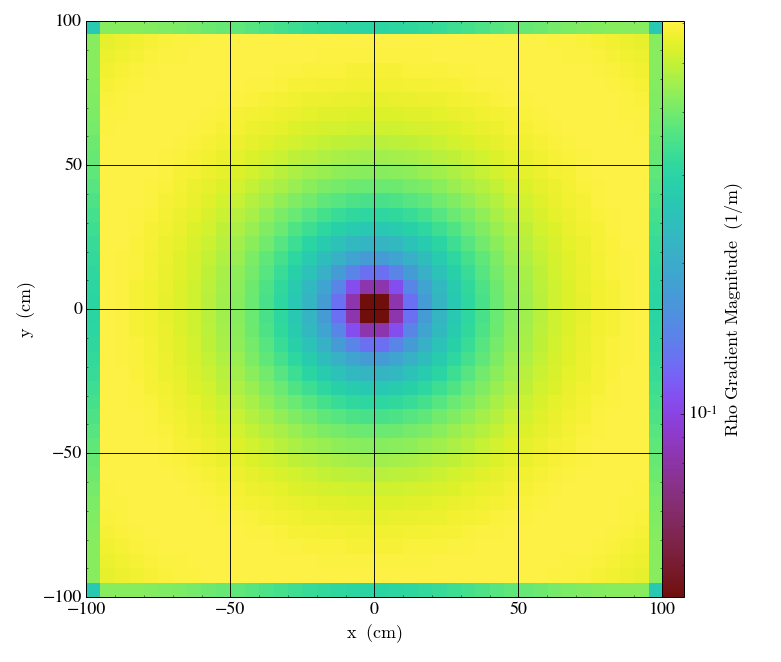

In [28]:
p = yt.SlicePlot(ds, "z", "rho_gradient_magnitude",center=[0,0,0],width=2)
p.annotate_grids()
p.show()

yt : [INFO     ] 2016-05-15 15:00:44,243 Reading 62000 cells for fields ['rho']
yt : [INFO     ] 2016-05-15 15:00:44,285 Reading 2000 cells for fields ['rho']
yt : [INFO     ] 2016-05-15 15:00:44,290 Projection completed
yt : [INFO     ] 2016-05-15 15:00:44,291 xlim = -1.000000 1.000000
yt : [INFO     ] 2016-05-15 15:00:44,291 ylim = -1.000000 1.000000
yt : [INFO     ] 2016-05-15 15:00:44,294 xlim = -1.000000 1.000000
yt : [INFO     ] 2016-05-15 15:00:44,294 ylim = -1.000000 1.000000
yt : [INFO     ] 2016-05-15 15:00:44,296 Making a fixed resolution buffer of (('simulationio', 'rho')) 800 by 800



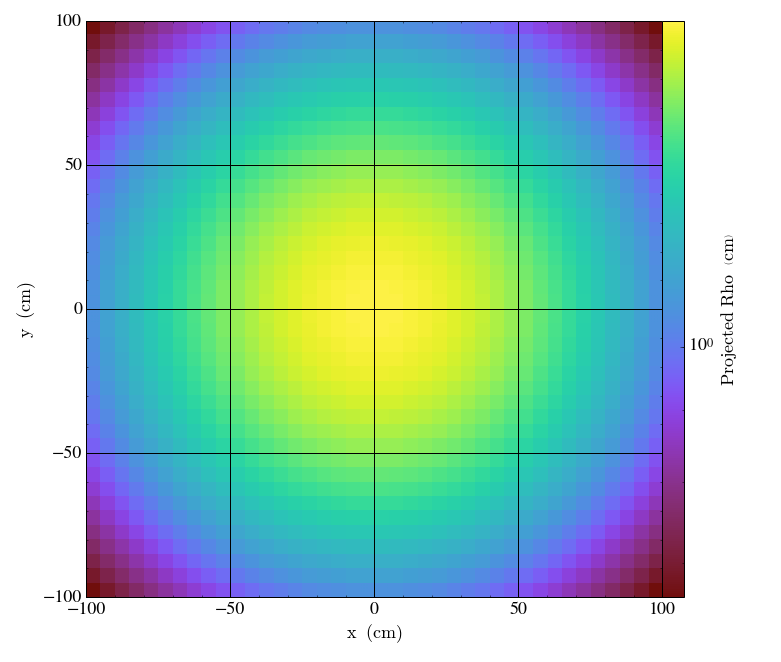

In [29]:
p = yt.ProjectionPlot(ds, "z", "rho",width=2)
p.annotate_grids()
p.show()

yt : [INFO     ] 2016-05-15 15:00:45,128 xlim = -0.500000 0.500000
yt : [INFO     ] 2016-05-15 15:00:45,129 ylim = -0.500000 0.500000
yt : [INFO     ] 2016-05-15 15:00:45,129 zlim = -0.500000 0.500000
yt : [INFO     ] 2016-05-15 15:00:45,130 Making a fixed resolution buffer of (('simulationio', 'rho')) 800 by 800
yt : [INFO     ] 2016-05-15 15:00:45,132 Creating default volume
yt : [INFO     ] 2016-05-15 15:00:45,137 Reading 1000 cells for fields ['rho']
yt : [INFO     ] 2016-05-15 15:00:45,140 Reading 1000 cells for fields ['rho']
yt : [INFO     ] 2016-05-15 15:00:45,142 Reading 1000 cells for fields ['rho']
yt : [INFO     ] 2016-05-15 15:00:45,145 Reading 1000 cells for fields ['rho']
yt : [INFO     ] 2016-05-15 15:00:45,149 Reading 1000 cells for fields ['rho']
yt : [INFO     ] 2016-05-15 15:00:45,151 Reading 1000 cells for fields ['rho']
yt : [INFO     ] 2016-05-15 15:00:45,154 Reading 1000 cells for fields ['rho']
yt : [INFO     ] 2016-05-15 15:00:45,157 Reading 1000 cells for fie


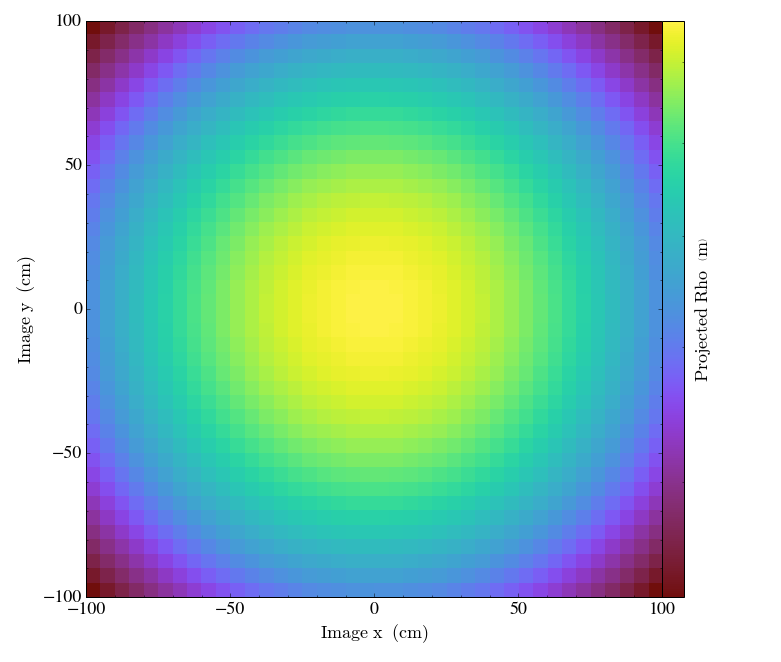

In [30]:
L = [0,0,1]
c = [0,0,-1]
image = yt.OffAxisProjectionPlot(ds,L,'rho',c,width=2.)
image.show()

yt : [INFO     ] 2016-05-15 15:00:46,418 Reading 1600 cells for fields ['rho']
yt : [INFO     ] 2016-05-15 15:00:46,432 xlim = -1.000000 1.000000
yt : [INFO     ] 2016-05-15 15:00:46,433 ylim = -1.000000 1.000000
yt : [INFO     ] 2016-05-15 15:00:46,436 xlim = -1.000000 1.000000
yt : [INFO     ] 2016-05-15 15:00:46,436 ylim = -1.000000 1.000000
yt : [INFO     ] 2016-05-15 15:00:46,438 Making a fixed resolution buffer of (('simulationio', 'rho')) 800 by 800
yt : [INFO     ] 2016-05-15 15:00:46,769 Reading 1600 cells for fields ['vel[0]']
yt : [INFO     ] 2016-05-15 15:00:46,785 Reading 1600 cells for fields ['vel[1]']



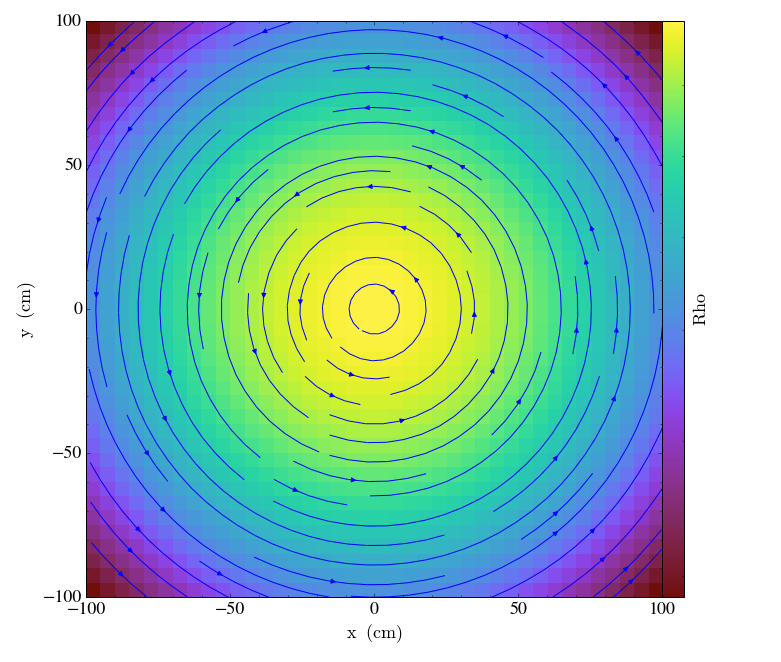

In [31]:
p = yt.SlicePlot(ds, "z", "rho")
p.annotate_streamlines("vel[0]", "vel[1]")
p.show()

yt : [INFO     ] 2016-05-15 15:00:47,441 Reading 1600 cells for fields ['rho']
yt : [INFO     ] 2016-05-15 15:00:47,452 xlim = -1.000000 1.000000
yt : [INFO     ] 2016-05-15 15:00:47,453 ylim = -1.000000 1.000000
yt : [INFO     ] 2016-05-15 15:00:47,454 xlim = -1.000000 1.000000
yt : [INFO     ] 2016-05-15 15:00:47,455 ylim = -1.000000 1.000000
yt : [INFO     ] 2016-05-15 15:00:47,456 Making a fixed resolution buffer of (('simulationio', 'rho')) 800 by 800
/home/jmiller/anaconda/lib/python2.7/site-packages/numpy/ma/core.py:824: RuntimeWarning: invalid value encountered in less_equal
  return umath.less_equal(x, self.critical_value)



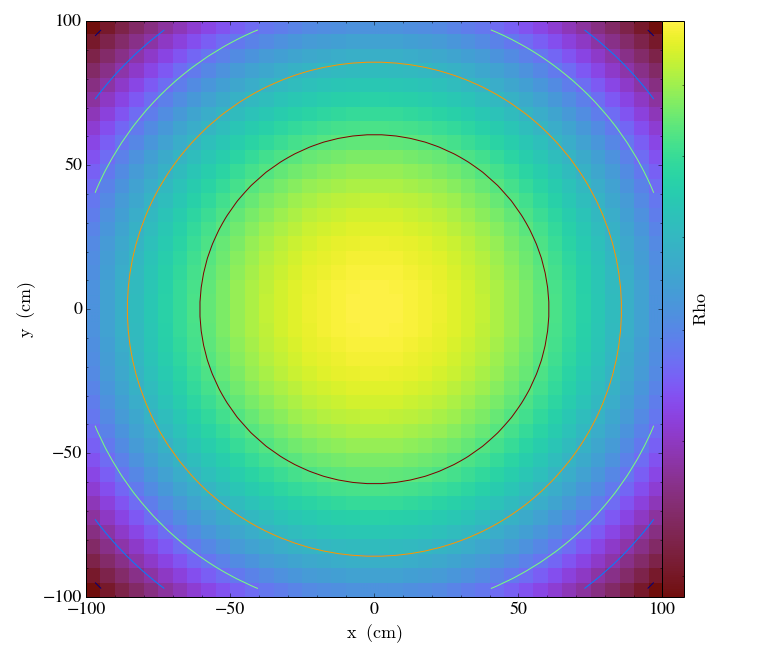

In [32]:
p = yt.SlicePlot(ds, "z", "rho")
p.annotate_contour("rho")
p.show()

yt : [INFO     ] 2016-05-15 15:00:48,140 Creating default volume
yt : [INFO     ] 2016-05-15 15:00:48,149 Reading 1000 cells for fields ['rho']
yt : [INFO     ] 2016-05-15 15:00:48,151 Reading 1000 cells for fields ['rho']
yt : [INFO     ] 2016-05-15 15:00:48,153 Reading 1000 cells for fields ['rho']
yt : [INFO     ] 2016-05-15 15:00:48,155 Reading 1000 cells for fields ['rho']
yt : [INFO     ] 2016-05-15 15:00:48,157 Reading 1000 cells for fields ['rho']
yt : [INFO     ] 2016-05-15 15:00:48,158 Reading 1000 cells for fields ['rho']
yt : [INFO     ] 2016-05-15 15:00:48,160 Reading 1000 cells for fields ['rho']
yt : [INFO     ] 2016-05-15 15:00:48,162 Reading 1000 cells for fields ['rho']
yt : [INFO     ] 2016-05-15 15:00:48,163 Reading 1000 cells for fields ['rho']
yt : [INFO     ] 2016-05-15 15:00:48,165 Reading 1000 cells for fields ['rho']
yt : [INFO     ] 2016-05-15 15:00:48,167 Reading 1000 cells for fields ['rho']
yt : [INFO     ] 2016-05-15 15:00:48,169 Reading 1000 cells for fi

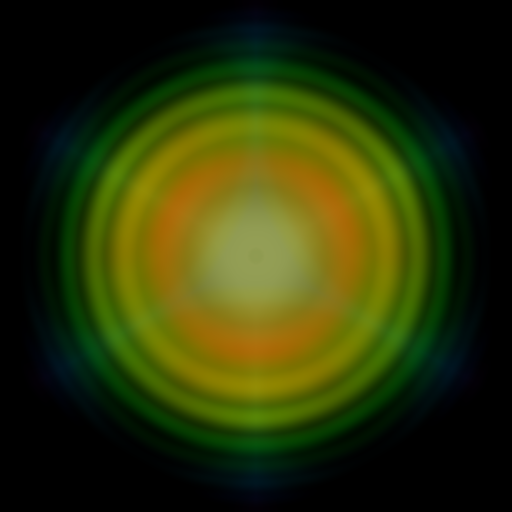

In [33]:
im, sc = yt.volume_render(ds,'rho')
sc.show(sigma_clip=4)